# Advanced Internship Assignment: Data Exploration & Analysis in Python

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set(style='whitegrid')

In [20]:
# Load the data

big_mart = pd.read_csv(r"C:\Users\Admin\Rasa_Intern\Files\big_mart_sales.csv")
big_mart.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [10]:
big_mart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [12]:
big_mart.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [26]:
# Data Cleaning & Imputation

# Impute with mean
if 'Item_Weight' in big_mart.columns:
    big_mart['Item_Weight'].fillna(big_mart['Item_Weight'].mean(), inplace=True)

# Impute with mode
if 'Outlet_Size' in big_mart.columns:
    big_mart['Outlet_Size'].fillna(big_mart['Outlet_Size'].mode()[0], inplace=True)

big_mart.head()

C:\Users\Admin\AppData\Local\Temp\ipykernel_21444\129300874.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  big_mart['Item_Weight'].fillna(big_mart['Item_Weight'].mean(), inplace=True)


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [38]:
# Feature Engineering

# Binning Item_Visibility
if 'Item_Visibility' in big_mart.columns: 
    big_mart['Item_Visibility_Bin'] = pd.cut(big_mart['Item_Visibility'], 
    bins=[-1, 0.02, 0.07, 0.2, 1.0], 
    labels=['Low', 'Medium', 'High', 'Very High'])

# Normalizing MRP
if 'Item_MRP' in big_mart.columns:
    big_mart['Item_MRP_Normalized'] = (big_mart['Item_MRP'] - big_mart['Item_MRP'].min()) / (big_mart['Item_MRP'].max() - big_mart['Item_MRP'].min())

big_mart.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Visibility_Bin,Item_MRP_Normalized
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,Low,0.927507
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,Low,0.072068
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,Low,0.468288
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800,Low,0.640093
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,Low,0.095805


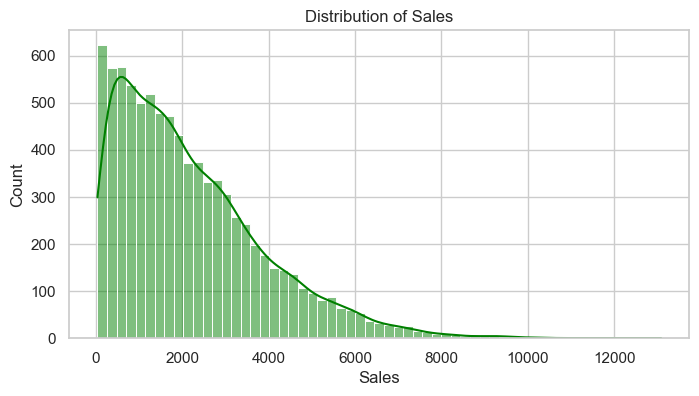

In [48]:
# Exploratory Data Analysis (EDA)

# Visualising of target variable
plt.figure(figsize=(8, 4))
sns.histplot(big_mart['Item_Outlet_Sales'], kde=True,color='green')
plt.title('Distribution of Sales')
plt.xlabel('Sales')
plt.ylabel('Count')
plt.show()

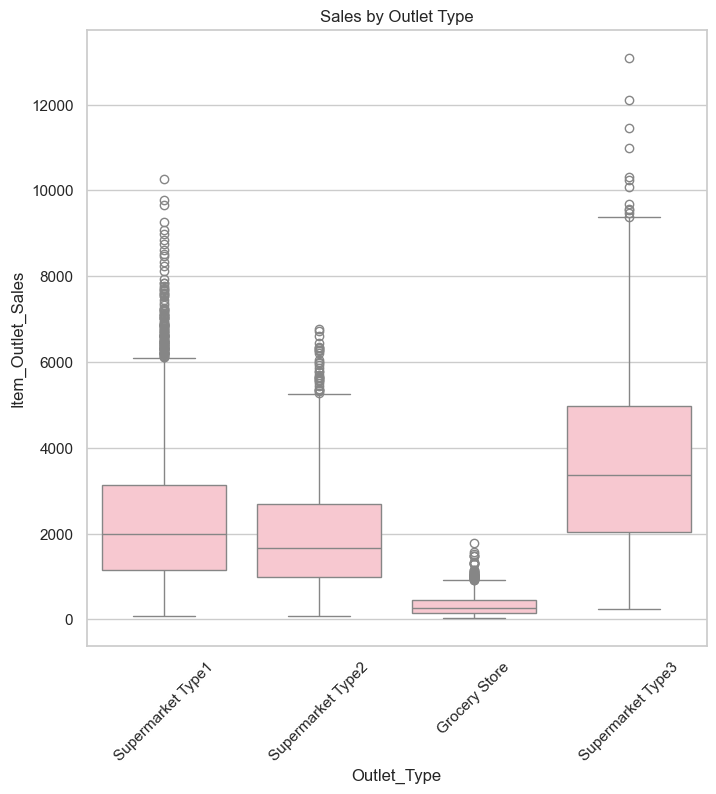

In [60]:
# Sales by Outlet Type

plt.figure(figsize=(8, 8)) 
sns.boxplot(data=big_mart, x='Outlet_Type', y='Item_Outlet_Sales',color='pink') 
plt.title('Sales by Outlet Type') 
plt.xticks(rotation=45) 
plt.show()

In [64]:
# Advanced Subsetting with NumPy & Conditions

# Filter high selling products
high_sales = big_mart['Item_Outlet_Sales'] > big_mart['Item_Outlet_Sales'].quantile(0.90)
df_high_sales = big_mart[high_sales]
df_high_sales[['Item_Identifier', 'Item_Outlet_Sales']].head()

,Item_Identifier,Item_Outlet_Sales
9,FDU28,4710.5350
43,FDC02,6768.5228
47,FDV49,5815.0972
54,NCP18,4815.0656
55,FDK21,6258.5200


In [70]:
#  Use NumPy to apply conditional logic

big_mart['High_Price'] = np.where(big_mart['Item_MRP'] > 200, 1, 0)
big_mart[['Item_MRP', 'High_Price']].head()

,Item_MRP,High_Price
0,249.8092,1
1,48.2692,0
2,141.6180,0
3,182.0950,0
4,53.8614,0


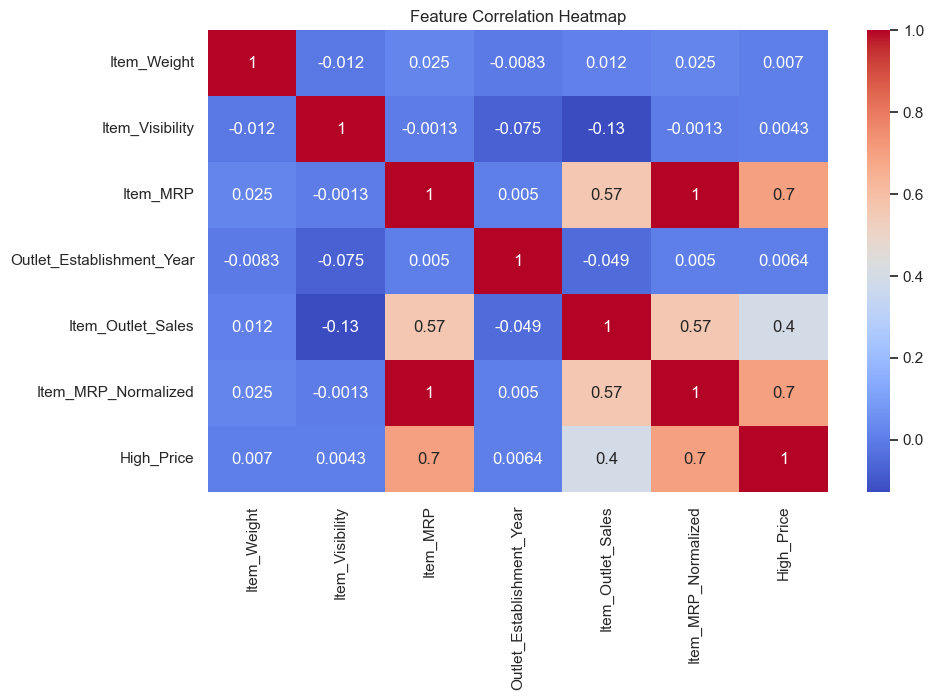

In [72]:
# Correlation Heatmap

plt.figure(figsize=(10, 6))
corr = big_mart.select_dtypes(include=[np.number]).corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()

# Final Project Task

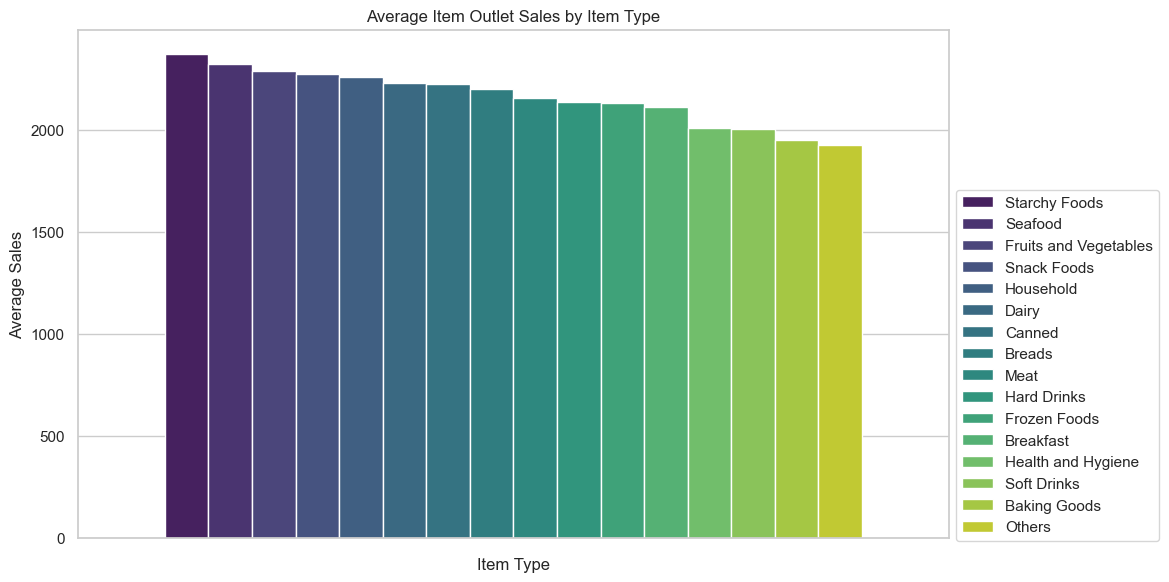

In [124]:
# What product categories perform best?

Cat=big_mart.groupby('Item_Type')['Item_Outlet_Sales'].agg(['mean']).sort_values(by='mean',ascending=False)
Cat=Cat.reset_index()

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(data=Cat, hue='Item_Type', y='mean', palette='viridis',legend=True)
plt.xticks(rotation=45, ha='right')
plt.title('Average Item Outlet Sales by Item Type')
plt.legend(loc='upper right',bbox_to_anchor=(1.25, 0.7))
plt.xlabel('Item Type')
plt.ylabel('Average Sales')
plt.tight_layout()
plt.show()

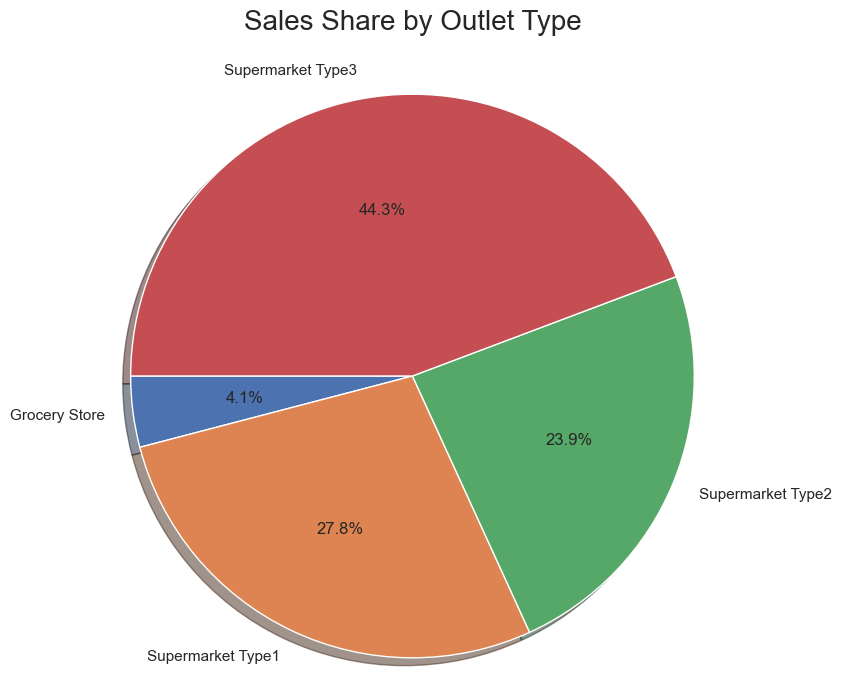

In [153]:
# Which outlet types generate more revenue?

Outlet_rev = big_mart.groupby('Outlet_Type')['Item_Outlet_Sales'].agg(['mean'])
Outlet_rev=Outlet_rev.reset_index()

sales_values = Outlet_rev['mean']
labels = Outlet_rev['Outlet_Type']

# Plot as pie chart
plt.figure(figsize=(8, 8))
plt.pie(sales_values, labels=labels,autopct='%1.1f%%', startangle=180, shadow=True)
plt.title("Sales Share by Outlet Type\n", fontsize=20)
plt.axis('equal')
plt.show()

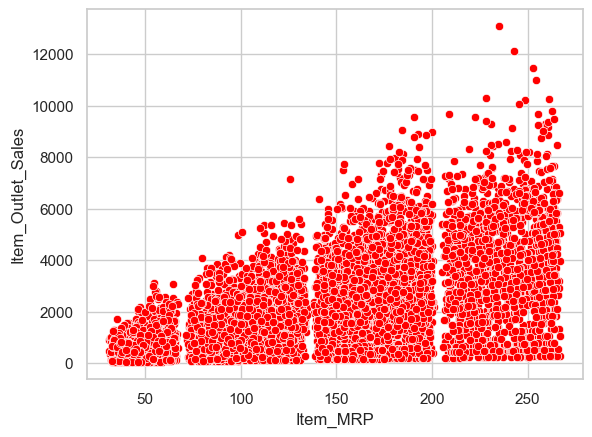

In [161]:
# Are high MRP products really driving more sales?

sns.scatterplot(x='Item_MRP',y='Item_Outlet_Sales',data=big_mart,color='red')
plt.show()